In [2]:
import pandas as pd
X = pd.read_csv("data/weatherAUS.csv")
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


In [3]:
from atom import ATOMClassifier

atom = ATOMClassifier(X, y='RainTomorrow', test_size=0.3, verbose=2)

2022-04-13 14:13:54.410967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-13 14:13:54.411044: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Woodwork may not support Python 3.7 in next non-bugfix release.
Featuretools may not support Python 3.7 in next non-bugfix release.


<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (142193, 22)
Memory: 61.69 MB
Scaled: False
Missing values: 316559 (10.1%)
Categorical features: 5 (23.8%)
Duplicate samples: 45 (0.0%)
-------------------------------------
Train set size: 99536
Test set size: 42657
-------------------------------------
|   |        dataset |          train |           test |
| - | -------------- | -------------- | -------------- |
| 0 |   110316 (3.5) |    77222 (3.5) |    33094 (3.5) |
| 1 |    31877 (1.0) |    22314 (1.0) |     9563 (1.0) |



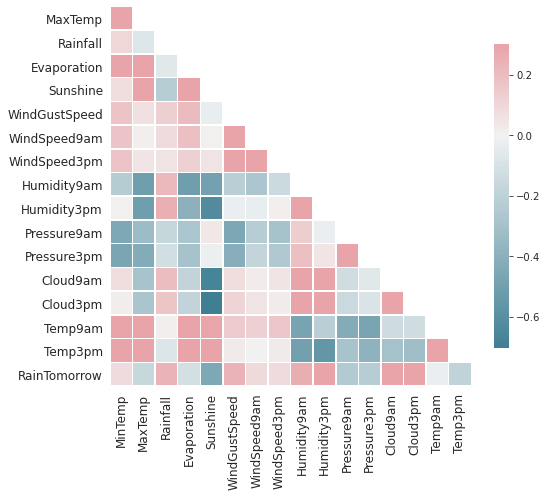

In [4]:
atom.plot_correlation()

In [6]:
atom.distribution(columns="Temp3pm")

Temp3pm
dist        stat           
beta        score    0.0256
            p_value     0.0
expon       score    0.4163
            p_value     0.0
gamma       score    0.0249
            p_value     0.0
invgauss    score     0.035
            p_value     0.0
lognorm     score    0.0249
            p_value     0.0
norm        score     0.039
            p_value     0.0
pearson3    score    0.0249
            p_value     0.0
triang      score    0.1908
            p_value     0.0
uniform     score    0.2766
            p_value     0.0
weibull_min score    0.0435
            p_value     0.0
weibull_max score    0.0217
            p_value     0.0

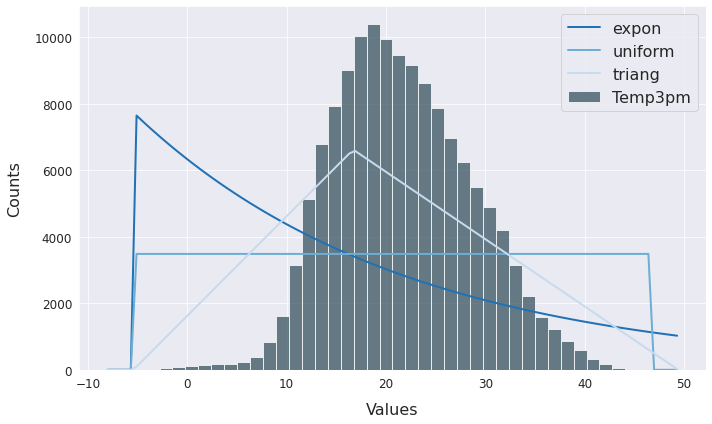

In [10]:
atom.plot_distribution(columns="Temp3pm", distributions=["expon", "uniform", "triang"])

In [11]:
atom.impute(strat_num="median", strat_cat="most_frequent")

Fitting Imputer...
Imputing missing values...
 --> Imputing 637 missing values with median (12.0) in feature MinTemp.
 --> Imputing 322 missing values with median (22.6) in feature MaxTemp.
 --> Imputing 1406 missing values with median (0.0) in feature Rainfall.
 --> Imputing 60843 missing values with median (4.7) in feature Evaporation.
 --> Imputing 67816 missing values with median (8.4) in feature Sunshine.
 --> Imputing 9330 missing values with most_frequent (W) in feature WindGustDir.
 --> Imputing 9270 missing values with median (39.0) in feature WindGustSpeed.
 --> Imputing 10013 missing values with most_frequent (N) in feature WindDir9am.
 --> Imputing 3778 missing values with most_frequent (SE) in feature WindDir3pm.
 --> Imputing 1348 missing values with median (13.0) in feature WindSpeed9am.
 --> Imputing 2630 missing values with median (19.0) in feature WindSpeed3pm.
 --> Imputing 1774 missing values with median (70.0) in feature Humidity9am.
 --> Imputing 3610 missing valu

In [12]:
atom.encode(strategy="LeaveOneOut")

Fitting Encoder...
Encoding categorical columns...
 --> LeaveOneOut-encoding feature Location. Contains 49 classes.
 --> LeaveOneOut-encoding feature WindGustDir. Contains 16 classes.
 --> LeaveOneOut-encoding feature WindDir9am. Contains 16 classes.
 --> LeaveOneOut-encoding feature WindDir3pm. Contains 16 classes.
 --> Ordinal-encoding feature RainToday. Contains 2 classes.


In [13]:
atom.dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.286822,16.1,19.1,13.0,4.7,8.4,0.218865,43.0,0.219498,0.223363,...,99.0,97.0,1012.9,1012.9,5.0,5.0,17.4,18.0,1.0,1
1,0.106975,14.1,29.9,0.0,4.0,5.3,0.285384,31.0,0.141390,0.173138,...,68.0,39.0,1008.0,1004.7,4.0,7.0,19.6,29.4,0.0,1
2,0.191211,2.3,12.5,0.0,0.6,8.4,0.274201,20.0,0.177671,0.280264,...,99.0,75.0,1027.2,1026.0,8.0,8.0,6.0,12.3,0.0,0
3,0.070915,18.7,34.0,0.0,21.2,8.4,0.189926,39.0,0.141390,0.250252,...,51.0,13.0,1011.0,1008.5,6.0,2.0,20.9,32.4,0.0,0
4,0.163842,15.2,36.1,0.0,8.0,8.4,0.160971,43.0,0.197547,0.171429,...,36.0,9.0,1015.1,1009.4,0.0,0.0,26.1,35.0,0.0,0


In [14]:
atom.run(models=["LR", "RF"], metric="f1")


Training ========================= >>
Models: LR, RF
Metric: f1


Results for Logistic Regression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.584
Test evaluation --> f1: 0.5861
Time elapsed: 0.873s
-------------------------------------------------
Total time: 0.873s


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9998
Test evaluation --> f1: 0.6181
Time elapsed: 23.814s
-------------------------------------------------
Total time: 23.814s


Final results ==================== >>
Duration: 24.689s
-------------------------------------
Logistic Regression --> f1: 0.5861
Random Forest       --> f1: 0.6181 ~ !


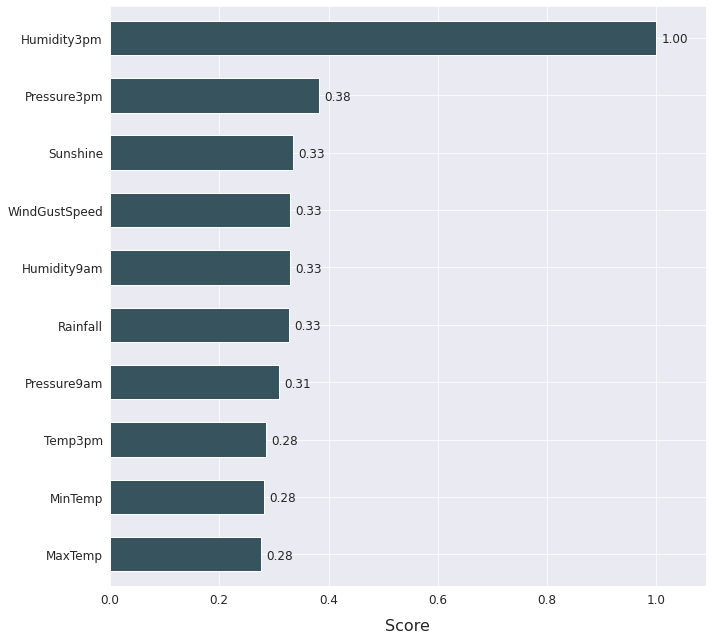

In [15]:
atom.RF.plot_feature_importance(show=10)

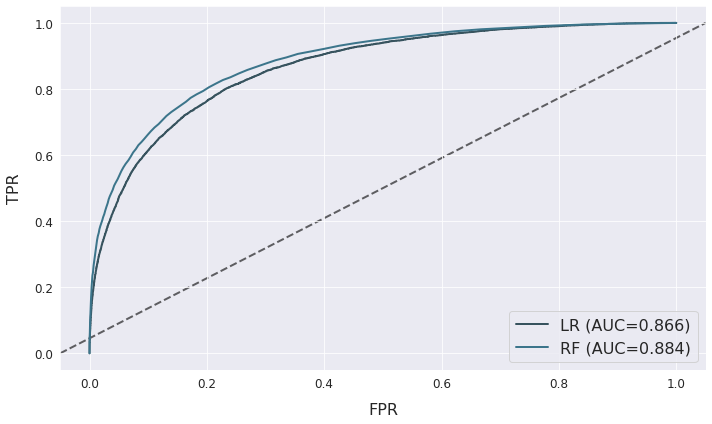

In [16]:
atom.plot_roc()

In [17]:
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
LR,0.842863,0.691557,0.719649,0.586107,0.414534,0.505600,0.715621,0.496288,0.865985
RF,0.857022,0.734254,0.735838,0.618120,0.447304,0.550563,0.770287,0.516156,0.884428
